In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")

from utils.preprocessing import *

In [ ]:
pose_csv = '/Users/kaycei/K on Server (NoMachine)/KayCei/Naturalistic Closed Loop/2nd Cohort/AD14-D1/Videos/022324-Rt Bilateral/VideoOutputCamera 0-23022024-151738DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

### original data table

In [4]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               930.476990  403.546021   
3                                               926.246216  395.111115   
6                                               920.276123  388.442200   
9                                               907.354004  388.928467   
12                                              902.718689  393.559570   
15                                              897.250000  417.958923   
18                                              905.124939  426.194672   
21                                              909.945923  435.406952   
24                                              905.044922  437.567627   
27                                              897.135620  446.446686   
30                                              898.340576  464.888611   
33                                              894.928101  470.806488   
36                                              890.851990  468.961334   
39                                              883.226013  462.917480   
42                                              875.294373  455.316437   
45                                              868.139038  445.042328   
48                                              859.468872  438.556396   
51                                              847.035461  432.964844   
54                                              836.864990  433.459259   
57                                              821.985535  432.188812   
60                                              815.230408  428.147064   
63                                              806.823792  428.951660   
66                                              801.091614  428.801941   
69                                              787.399780  424.137787   
72                                              773.993164  418.942871   
75                                              758.363220  410.095947   
78                                              726.628662  394.109009   
81                                              703.738953  385.331238   
84                                              683.143860  379.367859   
87                                              663.172852  372.212097   
90                                              638.677856  362.341370   
93                                              621.834045  353.381317   
96                                              607.613770  346.490356   
99                                              577.231323  325.923340   
102                                             553.875061  307.667206   
105                                             540.383301  289.574585   
108                                             545.150391  271.311157   
111                                             548.960449  262.045807   
114                                             544.935059  244.496658   
117                                             537.037842  228.123428   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           1.000000    921.939758  447.346161   0.999997   936.453308   
3           1.000000    920.030029  437.825592   0.999999   976.396606   
6           1.000000    900.815125  431.909210   1.000000   926.980652   
9           1.000000    895.481384  434.569458   1.000000   922.738098   
12          1.000000    895.084412  438.705078   0.999999   952.820251   
15          1.000000    894.164429  450.413055   1.000000   926.395813   
18          1.000000    895.885986  457.560638   0.999985   930.847290   
21          1.000000    921.499390  463.703735   0.999992   946.469543   
24 

### after removing likelihood and headers

In [5]:
pose[:5, :]

array([[930.47698975, 403.54602051, 921.9397583 , 447.34616089,
        936.45330811, 447.62567139, 930.39990234, 512.12670898,
        949.32720947, 553.0435791 , 903.84820557, 557.40588379],
       [929.30810547, 402.39251709, 923.24267578, 446.55395508,
        976.79327393, 469.21112061, 930.35217285, 511.49942017,
        951.96783447, 552.28924561, 906.66314697, 557.96032715],
       [929.73657227, 400.61331177, 923.52062988, 442.51535034,
        976.63720703, 469.82077026, 930.80462646, 511.79116821,
        958.19519043, 547.14996338, 909.14855957, 559.043396  ],
       [926.24621582, 395.1111145 , 920.0300293 , 437.82559204,
        976.39660645, 469.79669189, 931.50872803, 511.06173706,
        963.40283203, 541.40795898, 911.15252686, 559.50286865],
       [922.57354736, 389.72286987, 907.25872803, 433.98422241,
        930.2199707 , 434.86233521, 931.76831055, 510.78738403,
        970.21813965, 528.79290771, 918.58001709, 557.68969727]])

### plot

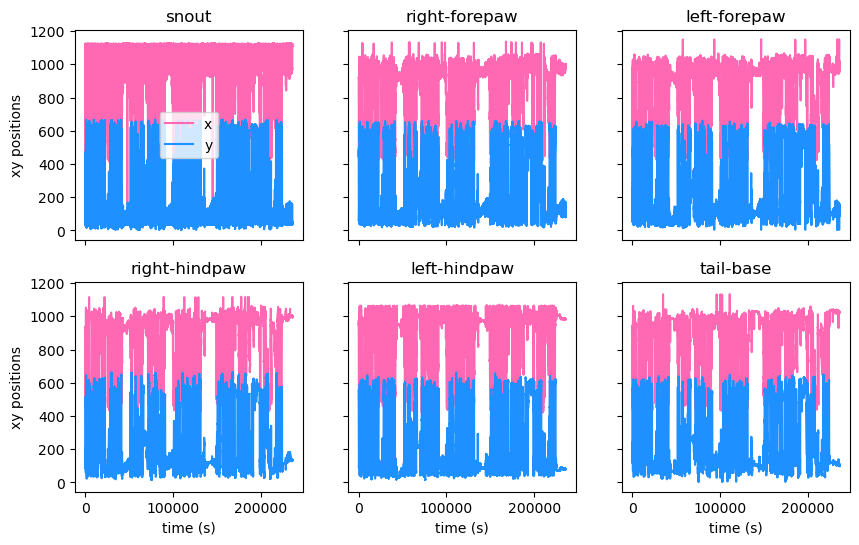

In [6]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [7]:
np.save('../processed_data/pose_video_2.npy', pose)